In [252]:
# Esta celda actúa sobre la libreta, y permite que se aproveche mejor el espacio.
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%}</style>"))
import sys
print(sys.executable) 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
from sklearn import preprocessing

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El codigo Python de este cuaderno está oculto para facilitar la lectura.
Para mostrar/ocultar el código, haz click <a href="javascript:code_toggle()">aquí.</a>.''')

c:\users\48259328\appdata\local\programs\python\python38\python.exe


In [253]:
import pandas as pd
#df_alg=pd.read_csv('output/experimento_2datasets_2_10.csv')
df_alg=pd.read_csv('output/merged_output.txt')
display(df_alg.tail(5))
#display(df_alg.info())
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Selection Scheme': "string",
                'Selection Candidates': "int64",
                'Crossover Scheme': "string",
                'Crossover Probability': "float64",
                'Mutation Scheme': "string",
                'Mutation Probability': "float64",
                'Replacement Scheme': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64"
               } 
df_alg = df_alg.astype(convert_dict) 
display(df_alg.info()) 

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
12955,dataset2,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,mutation,0.0,elitism,4362.744941,0.695764,0.718824,291,110063.2,1.050946,456.0,0.088846
12956,dataset2,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,mutation,0.0,elitism,4557.249613,0.694967,0.718824,244,110063.2,1.027212,506.0,0.087398
12957,dataset2,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,mutation,0.0,elitism,5552.077378,0.694758,0.718824,133,124823.4,1.031284,508.0,0.087703
12958,dataset2,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,mutation,0.0,elitism,6741.762753,0.695618,0.718824,122,124823.4,1.013731,573.0,0.095502
12959,dataset2,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,mutation,0.0,elitism,6689.672866,0.700694,0.722438,53,111500.2,1.022206,608.0,0.092199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dataset                12960 non-null  string 
 1   Algorithm              12960 non-null  string 
 2   Population Length      12960 non-null  int64  
 3   Generations            12960 non-null  int64  
 4   Selection Scheme       12960 non-null  string 
 5   Selection Candidates   12960 non-null  int64  
 6   Crossover Scheme       12960 non-null  string 
 7   Crossover Probability  12960 non-null  float64
 8   Mutation Scheme        12960 non-null  string 
 9   Mutation Probability   12960 non-null  float64
 10  Replacement Scheme     12960 non-null  string 
 11  Time(s)                12960 non-null  float64
 12  AvgValue               12960 non-null  float64
 13  BestAvgValue           12960 non-null  float64
 14  BestGeneration         12960 non-null  int64  
 15  HV

None

In [254]:
summary=(
df_alg.groupby(['Dataset','Algorithm','Population Length', 'Generations'])
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
    .agg(['mean'])
    .reset_index()
)
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Dataset, )             54 non-null     object 
 1   (Algorithm, )           54 non-null     object 
 2   (Population Length, )   54 non-null     int64  
 3   (Generations, )         54 non-null     int64  
 4   (Time(s), mean)         54 non-null     float64
 5   (HV, mean)              36 non-null     float64
 6   (Spread, mean)          36 non-null     float64
 7   (AvgValue, mean)        54 non-null     float64
 8   (BestAvgValue, mean)    54 non-null     float64
 9   (BestGeneration, mean)  54 non-null     float64
 10  (NumSolutions, mean)    36 non-null     float64
 11  (Spacing, mean)         36 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.2+ KB


---
# Dataset 1

## Dataset 1-Genetic analysis

In [255]:
df_genetic=summary[(summary['Dataset']=='dataset1') & (summary['Algorithm']=='GeneticAlgorithm')]
df_genetic

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
0,dataset1,GeneticAlgorithm,20,100,1.707757,NaN,NaN,2.183878,3.402755,51.033333,NaN,NaN
1,dataset1,GeneticAlgorithm,20,200,3.412911,NaN,NaN,2.195068,3.428236,104.322222,NaN,NaN
2,dataset1,GeneticAlgorithm,20,300,5.134056,NaN,NaN,2.199117,3.491767,155.144444,NaN,NaN
3,dataset1,GeneticAlgorithm,30,100,2.548681,NaN,NaN,2.169066,3.586608,53.988889,NaN,NaN
4,dataset1,GeneticAlgorithm,30,200,5.041459,NaN,NaN,2.162521,3.503085,103.411111,NaN,NaN
5,dataset1,GeneticAlgorithm,30,300,7.513502,NaN,NaN,2.178913,3.608721,158.794444,NaN,NaN
6,dataset1,GeneticAlgorithm,40,100,3.342308,NaN,NaN,2.177085,3.734786,49.622222,NaN,NaN
7,dataset1,GeneticAlgorithm,40,200,6.637490,NaN,NaN,2.169659,3.585457,98.966667,NaN,NaN
8,dataset1,GeneticAlgorithm,40,300,9.840644,NaN,NaN,2.179684,3.721493,150.205556,NaN,NaN


## Dataset 1-GeneticNDS analysis

In [256]:
df_geneticnds1=df_alg[(df_alg['Replacement Scheme']=='elitism')]
df_geneticnds1=(
    df_geneticnds1.groupby(['Dataset','Algorithm','Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(['mean'])\
    .reset_index()\
)
df_geneticnds1=df_geneticnds1[(df_geneticnds1['Dataset']=='dataset1') & (df_geneticnds1['Algorithm']=='GeneticNDSAlgorithm')]
display(df_geneticnds1)

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
9,dataset1,GeneticNDSAlgorithm,20,100,19.128892,9340.276667,0.804779,4.103803,5.882689,51.033333,66.644444,0.310952
10,dataset1,GeneticNDSAlgorithm,20,200,64.616604,9718.964444,0.831153,4.289172,6.158958,104.322222,87.994444,0.313837
11,dataset1,GeneticNDSAlgorithm,20,300,151.706529,10471.625556,0.845370,4.420104,6.503968,155.144444,107.216667,0.318676
12,dataset1,GeneticNDSAlgorithm,30,100,22.965517,9342.903333,0.809045,4.098700,5.950668,53.988889,67.233333,0.327403
13,dataset1,GeneticNDSAlgorithm,30,200,80.631806,10250.381111,0.840435,4.328046,6.301024,103.411111,96.122222,0.323146
14,dataset1,GeneticNDSAlgorithm,30,300,158.378964,10472.752222,0.846452,4.547708,6.778003,158.794444,112.600000,0.331570
15,dataset1,GeneticNDSAlgorithm,40,100,25.927795,9783.460000,0.777024,4.254238,6.143318,49.622222,66.611111,0.333469
16,dataset1,GeneticNDSAlgorithm,40,200,99.323097,10401.662222,0.839584,4.542976,6.633236,98.966667,100.094444,0.345898
17,dataset1,GeneticNDSAlgorithm,40,300,220.384797,10876.861111,0.851675,4.641264,6.675603,150.205556,125.416667,0.344716


In [257]:
df_geneticnds1=df_alg[(df_alg['Replacement Scheme']=='elitismnds')]
df_geneticnds1=(
    df_geneticnds1.groupby(['Dataset','Algorithm','Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(['mean'])\
    .reset_index()\
)
df_geneticnds1=df_geneticnds1[(df_geneticnds1['Dataset']=='dataset1') & (df_geneticnds1['Algorithm']=='GeneticNDSAlgorithm')]
display(df_geneticnds1)

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
0,dataset1,GeneticNDSAlgorithm,20,100,53.490120,9380.022222,0.899823,4.642198,5.995562,34.094444,111.016667,0.337110
1,dataset1,GeneticNDSAlgorithm,20,200,243.819547,9986.816667,0.941545,5.069717,6.470839,59.255556,177.600000,0.356105
2,dataset1,GeneticNDSAlgorithm,20,300,882.361799,10662.505556,0.958800,5.293907,6.628839,88.738889,278.922222,0.355169
3,dataset1,GeneticNDSAlgorithm,30,100,39.781886,9706.518889,0.878988,4.528914,5.937668,34.294444,92.044444,0.360401
4,dataset1,GeneticNDSAlgorithm,30,200,222.220977,10272.077778,0.927963,5.040420,6.547688,63.700000,166.600000,0.367477
5,dataset1,GeneticNDSAlgorithm,30,300,687.340599,10768.640000,0.957377,5.373515,6.717357,77.983333,235.172222,0.380558
6,dataset1,GeneticNDSAlgorithm,40,100,59.995730,9665.726667,0.874430,4.742973,6.139895,32.350000,111.266667,0.358648
7,dataset1,GeneticNDSAlgorithm,40,200,298.152317,10435.251111,0.936296,5.146919,6.524096,56.472222,188.905556,0.352243
8,dataset1,GeneticNDSAlgorithm,40,300,792.536239,10716.065556,0.934075,5.242104,6.662274,92.416667,255.272222,0.357568


## Dataset 1-NSGA-II analysis

In [258]:
df_nsgaii=summary[(summary['Dataset']=='dataset1') & (summary['Algorithm']=='NSGAIIAlgorithm')]
df_nsgaii

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
18,dataset1,NSGAIIAlgorithm,20,100,8.512611,9513.098889,0.870589,3.508762,5.669358,62.988889,19.583333,0.324516
19,dataset1,NSGAIIAlgorithm,20,200,16.744606,10984.332222,0.870231,3.644474,6.156699,121.483333,19.605556,0.355906
20,dataset1,NSGAIIAlgorithm,20,300,25.155331,11818.254444,0.869528,3.659734,6.370381,179.488889,19.633333,0.367149
21,dataset1,NSGAIIAlgorithm,30,100,15.789785,10095.175556,0.906248,3.691765,6.118918,62.822222,28.000000,0.326869
22,dataset1,NSGAIIAlgorithm,30,200,31.071166,11827.263333,0.906513,3.855722,6.842860,124.038889,28.700000,0.358048
23,dataset1,NSGAIIAlgorithm,30,300,46.279772,12484.602222,0.906042,3.897846,7.038839,178.400000,28.811111,0.370481
24,dataset1,NSGAIIAlgorithm,40,100,25.069891,10410.364444,0.926221,3.776488,6.412787,65.516667,35.500000,0.328103
25,dataset1,NSGAIIAlgorithm,40,200,48.879068,11946.086667,0.927692,3.970740,7.046616,113.033333,35.822222,0.364857
26,dataset1,NSGAIIAlgorithm,40,300,112.571775,12803.860000,0.927715,4.056927,7.348740,162.366667,35.700000,0.386323


---
# Dataset 2

## Dataset 2-Genetic analysis

In [259]:
df_genetic2=summary[(summary['Dataset']=='dataset2') & (summary['Algorithm']=='GeneticAlgorithm')]
df_genetic2

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
27,dataset2,GeneticAlgorithm,20,100,7.378058,NaN,NaN,0.553994,0.636262,55.377778,NaN,NaN
28,dataset2,GeneticAlgorithm,20,200,14.770519,NaN,NaN,0.553712,0.636339,104.733333,NaN,NaN
29,dataset2,GeneticAlgorithm,20,300,22.073364,NaN,NaN,0.554624,0.637251,164.672222,NaN,NaN
30,dataset2,GeneticAlgorithm,30,100,10.946712,NaN,NaN,0.552972,0.644932,55.444444,NaN,NaN
31,dataset2,GeneticAlgorithm,30,200,21.468889,NaN,NaN,0.553170,0.647894,115.066667,NaN,NaN
32,dataset2,GeneticAlgorithm,30,300,32.365515,NaN,NaN,0.552821,0.642169,164.072222,NaN,NaN
33,dataset2,GeneticAlgorithm,40,100,14.329580,NaN,NaN,0.551679,0.645064,54.661111,NaN,NaN
34,dataset2,GeneticAlgorithm,40,200,28.664678,NaN,NaN,0.552074,0.648898,112.400000,NaN,NaN
35,dataset2,GeneticAlgorithm,40,300,42.286104,NaN,NaN,0.552445,0.648881,164.633333,NaN,NaN


## Dataset 2-GeneticNDS analysis

In [260]:
df_geneticnds2=df_alg[(df_alg['Replacement Scheme']=='elitism')]
df_geneticnds2=(
    df_geneticnds2.groupby(['Dataset','Algorithm','Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(['mean'])\
    .reset_index()\
)
df_geneticnds2=df_geneticnds2[(df_geneticnds2['Dataset']=='dataset2') & (df_geneticnds2['Algorithm']=='GeneticNDSAlgorithm')]
display(df_geneticnds2)

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
36,dataset2,GeneticNDSAlgorithm,20,100,126.532525,79738.781111,0.869291,0.668205,0.721123,55.377778,93.044444,0.109242
37,dataset2,GeneticNDSAlgorithm,20,200,545.912650,90750.287778,0.916826,0.678801,0.731198,104.733333,136.927778,0.107827
38,dataset2,GeneticNDSAlgorithm,20,300,1750.119696,94893.764444,0.945465,0.686347,0.739265,164.672222,187.605556,0.109244
39,dataset2,GeneticNDSAlgorithm,30,100,156.610015,87837.918889,0.845674,0.669235,0.728376,55.444444,97.033333,0.113137
40,dataset2,GeneticNDSAlgorithm,30,200,654.848681,93862.417778,0.904570,0.681736,0.737217,115.066667,147.577778,0.109829
41,dataset2,GeneticNDSAlgorithm,30,300,1617.888659,99653.418889,0.919802,0.692053,0.751460,164.072222,177.194444,0.111497
42,dataset2,GeneticNDSAlgorithm,40,100,160.430773,90387.992222,0.875823,0.671023,0.729595,54.661111,94.783333,0.112865
43,dataset2,GeneticNDSAlgorithm,40,200,651.777774,99427.153333,0.907416,0.681232,0.746855,112.400000,144.561111,0.113588
44,dataset2,GeneticNDSAlgorithm,40,300,1323.773426,101412.116667,0.902263,0.690093,0.753273,164.633333,170.488889,0.118603


In [261]:
df_geneticnds2=df_alg[(df_alg['Replacement Scheme']=='elitismnds')]
df_geneticnds2=(
    df_geneticnds2.groupby(['Dataset','Algorithm','Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(['mean'])\
    .reset_index()\
)
df_geneticnds2=df_geneticnds2[(df_geneticnds2['Dataset']=='dataset2') & (df_geneticnds2['Algorithm']=='GeneticNDSAlgorithm')]
df_geneticnds2

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
9,dataset2,GeneticNDSAlgorithm,20,100,203.042950,84292.133333,0.914726,0.714390,0.812058,44.677778,113.016667,0.123833
10,dataset2,GeneticNDSAlgorithm,20,200,1116.070973,101233.157778,0.969154,0.769302,0.904076,94.822222,180.061111,0.127967
11,dataset2,GeneticNDSAlgorithm,20,300,3673.832884,111431.134444,0.970452,0.805456,0.984114,155.772222,253.277778,0.146095
12,dataset2,GeneticNDSAlgorithm,30,100,191.342989,90937.136667,0.877560,0.718553,0.826087,51.277778,106.105556,0.130696
13,dataset2,GeneticNDSAlgorithm,30,200,1149.456206,106065.941111,0.940211,0.770092,0.925123,108.788889,177.427778,0.149335
14,dataset2,GeneticNDSAlgorithm,30,300,3322.507085,123615.185556,0.980759,0.806562,0.987333,165.772222,239.794444,0.159296
15,dataset2,GeneticNDSAlgorithm,40,100,247.211255,90316.174444,0.934366,0.718357,0.818608,53.566667,114.588889,0.113666
16,dataset2,GeneticNDSAlgorithm,40,200,1253.133923,111011.378889,0.945794,0.757788,0.905943,111.761111,184.755556,0.135962
17,dataset2,GeneticNDSAlgorithm,40,300,2663.138094,115937.288889,0.968709,0.803206,0.980678,162.500000,221.616667,0.147240


## Dataset 2-NSGA-II analysis

In [262]:
df_nsgaii2=summary[(summary['Dataset']=='dataset2') & (summary['Algorithm']=='NSGAIIAlgorithm')]
df_nsgaii2

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
45,dataset2,NSGAIIAlgorithm,20,100,33.142455,85357.284444,0.889291,0.626689,0.698451,63.877778,19.844444,0.146623
46,dataset2,NSGAIIAlgorithm,20,200,65.433184,118729.346667,0.886077,0.630843,0.714518,132.761111,19.838889,0.170791
47,dataset2,NSGAIIAlgorithm,20,300,96.700382,151728.590000,0.884583,0.632946,0.728788,193.216667,19.855556,0.191994
48,dataset2,NSGAIIAlgorithm,30,100,60.219373,90343.851111,0.916002,0.641078,0.714991,67.088889,29.672222,0.146573
49,dataset2,NSGAIIAlgorithm,30,200,117.454577,127288.043333,0.914999,0.648574,0.740209,144.066667,29.683333,0.171636
50,dataset2,NSGAIIAlgorithm,30,300,175.851864,157253.196667,0.914625,0.658174,0.765577,217.727778,29.711111,0.190417
51,dataset2,NSGAIIAlgorithm,40,100,92.710054,98334.808889,0.932151,0.645515,0.725139,72.327778,39.150000,0.148850
52,dataset2,NSGAIIAlgorithm,40,200,184.070168,132943.491111,0.931661,0.663664,0.766579,151.011111,39.538889,0.171231
53,dataset2,NSGAIIAlgorithm,40,300,276.656571,162418.504444,0.932225,0.677381,0.802073,229.827778,39.611111,0.191102


---
# Best Average Value for NSGA-II

In [263]:
df_best1=df_nsgaii[(df_nsgaii["Population Length"]==40) & (df_nsgaii["Generations"]==300)]
df_best2=df_nsgaii2[(df_nsgaii2["Population Length"]==40) & (df_nsgaii2["Generations"]==300)]
df_best_algs=pd.concat([df_best1,df_best2])
display(df_best_algs)

,Dataset,Algorithm,Population Length,Generations,Time(s),HV,Spread,AvgValue,BestAvgValue,BestGeneration,NumSolutions,Spacing
,,,,,mean,mean,mean,mean,mean,mean,mean,mean
26,dataset1,NSGAIIAlgorithm,40,300,112.571775,12803.860000,0.927715,4.056927,7.348740,162.366667,35.700000,0.386323
53,dataset2,NSGAIIAlgorithm,40,300,276.656571,162418.504444,0.932225,0.677381,0.802073,229.827778,39.611111,0.191102


In [264]:
df_best_conf=df_alg[(df_alg["Population Length"]==40) & (df_alg["Generations"]==300)&(df_alg['Algorithm']=='NSGAIIAlgorithm')]
summary2=(
df_best_conf.groupby(['Crossover Probability','Mutation Probability'])
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()
    .sort_values("mean_avgvalue",ascending=False)
)
summary2

,Crossover Probability,Mutation Probability,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
11,0.85,1.00,172.772707,142367.94,0.929849,2.574166,4.774706,204.10,36.90,0.345955
5,0.80,1.00,181.028092,182353.97,0.929530,2.561099,4.783693,178.90,36.60,0.363323
4,0.80,0.70,181.130435,140959.84,0.930856,2.549390,4.773716,203.30,34.65,0.349925
17,0.90,1.00,179.140780,113251.83,0.929534,2.528624,4.605959,187.65,36.85,0.321911
10,0.85,0.70,175.600958,124110.28,0.929778,2.519988,4.658464,214.60,35.25,0.337181
3,0.80,0.50,171.930696,118645.12,0.930934,2.512505,4.599498,237.30,34.00,0.338175
16,0.90,0.70,179.275560,97069.26,0.931302,2.498623,4.705929,197.45,35.40,0.325143
9,0.85,0.50,192.142803,96061.74,0.931500,2.483799,4.585026,227.65,34.15,0.321298
15,0.90,0.50,180.258839,84304.26,0.931338,2.435407,4.409562,249.35,34.05,0.301997
14,0.90,0.10,173.149621,53268.76,0.929913,2.311318,3.760799,217.55,39.95,0.251839


# Best Average Value for GeneticNDS

In [265]:
df_best_conf=df_alg[(df_alg["Population Length"]==40) & (df_alg["Generations"]==300)&(df_alg['Algorithm']=='GeneticNDSAlgorithm')]
summary3=(
df_best_conf.groupby(['Crossover Probability','Mutation Probability'])
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()
    .sort_values("mean_avgvalue",ascending=False)
)
summary3

,Crossover Probability,Mutation Probability,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
8,0.85,0.10,1359.563179,54413.710,1.022469,3.441826,4.117108,135.275,262.075,0.253070
7,0.85,0.05,1706.128493,56459.715,1.044803,3.375112,4.120104,113.800,289.000,0.236984
1,0.80,0.05,2048.080714,44684.610,1.048551,3.299161,3.745365,144.650,342.850,0.246815
2,0.80,0.10,1721.598961,70955.945,0.992873,3.230221,3.932033,161.650,296.175,0.244223
6,0.85,0.00,4821.829081,51098.520,1.159069,3.195507,3.535186,105.175,460.825,0.201102
14,0.90,0.10,620.206293,57446.415,0.993999,3.191893,3.928655,142.125,193.075,0.249215
13,0.90,0.05,833.634927,51111.560,1.003809,3.144991,4.200814,128.575,211.925,0.241963
0,0.80,0.00,5567.259019,52318.610,1.090769,3.072113,3.352020,97.250,659.050,0.157202
3,0.80,0.50,258.786374,75828.540,0.904943,3.044459,4.240875,149.375,47.350,0.306047
12,0.90,0.00,2457.190325,52850.050,1.082124,2.862954,3.187975,89.375,349.300,0.168148


## NSGA-II 300Gener;40PopLen;0.85CrossProb;0.1MutProb - orange
## GeneticNDS 300Gener;40PopLen;0.85CrossProb;0.05MutProb - blue
<img src="output/images/Figure_2.png">

In [277]:
df_radar = df_alg.copy(deep=True)

#df_radar[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']]=df_radar[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#dividir por algoritmo y dataset
df_star_d1_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset2')]
df_star_d1_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset2')]

#calcular la media
df_star_d1_gnds_means=df_star_d1_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_gnds_means=df_star_d2_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d1_nsgaii_means=df_star_d1_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_nsgaii_means=df_star_d2_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()

display(df_star_d1_gnds_means)
display(df_star_d1_nsgaii_means)
display(df_star_d2_gnds_means)
display(df_star_d2_nsgaii_means)
print("-----------------\n")


#invertir los valores que son mejores cuanto menores son
#df_radar['Time(s)']=(1/df_radar['Time(s)'])*1000
#df_radar['Spread']=(1/df_radar['Spread'])

df_star_d1_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset2')]
df_star_d1_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset2')]

df_star_d1_gnds_means=df_star_d1_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_gnds_means=df_star_d2_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d1_nsgaii_means=df_star_d1_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_nsgaii_means=df_star_d2_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()

display(df_star_d1_gnds_means)
display(df_star_d1_nsgaii_means)
display(df_star_d2_gnds_means)
display(df_star_d2_nsgaii_means)
print("-----------------\n")

#normalizar valores
#min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
df_radar['HV'] = min_max_scaler.fit_transform(df_radar[['HV']].values.astype(float))
df_radar['Spread'] = min_max_scaler.fit_transform(df_radar[['Spread']].values.astype(float))
df_radar['Spacing'] = min_max_scaler.fit_transform(df_radar[['Spacing']].values.astype(float))
df_radar['NumSolutions'] = min_max_scaler.fit_transform(df_radar[['NumSolutions']].values.astype(float))
df_radar['AvgValue'] = min_max_scaler.fit_transform(df_radar[['AvgValue']].values.astype(float))
df_radar['Time(s)'] = min_max_scaler.fit_transform(df_radar[['Time(s)']].values.astype(float))

#df_radar['HV'] = np.log10(df_radar[['HV']].values.astype(float))
#df_radar['Spread'] = np.log10(df_radar[['Spread']].values.astype(float))
#df_radar['Spacing'] = np.log10(df_radar[['Spacing']].values.astype(float))
#df_radar['NumSolutions'] = np.log10(df_radar[['NumSolutions']].values.astype(float))
#df_radar['AvgValue'] = np.log10(df_radar[['AvgValue']].values.astype(float))
#df_radar['Time(s)'] = np.log10(df_radar[['Time(s)']].values.astype(float))

#df_radar['Time(s)']=(1/df_radar['Time(s)'])
#df_radar['Spread']=(1/df_radar['Spread'])

#dividir por algoritmo y dataset
df_star_d1_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset2')]
df_star_d1_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset2')]
#calcular la media
df_star_d1_gnds_means=df_star_d1_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_gnds_means=df_star_d2_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d1_nsgaii_means=df_star_d1_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_nsgaii_means=df_star_d2_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()

display(df_star_d1_gnds_means)
display(df_star_d1_nsgaii_means)
display(df_star_d2_gnds_means)
display(df_star_d2_nsgaii_means)

HV              10125.139506
Spread              0.875267
Spacing             0.343053
NumSolutions      135.929630
AvgValue            4.683704
Time(s)           229.042401
dtype: float64

HV              11320.337531
Spread              0.901198
Spacing             0.353584
NumSolutions       27.928395
AvgValue            3.784718
Time(s)            36.674889
dtype: float64

HV              98489.076790
Spread              0.921603
Spacing             0.124440
NumSolutions      157.770062
AvgValue            0.721246
Time(s)          1155.979475
dtype: float64

HV              124933.012963
Spread               0.911291
Spacing              0.169913
NumSolutions        29.656173
AvgValue             0.647207
Time(s)            122.470959
dtype: float64

-----------------



HV              10125.139506
Spread              0.875267
Spacing             0.343053
NumSolutions      135.929630
AvgValue            4.683704
Time(s)           229.042401
dtype: float64

HV              11320.337531
Spread              0.901198
Spacing             0.353584
NumSolutions       27.928395
AvgValue            3.784718
Time(s)            36.674889
dtype: float64

HV              98489.076790
Spread              0.921603
Spacing             0.124440
NumSolutions      157.770062
AvgValue            0.721246
Time(s)          1155.979475
dtype: float64

HV              124933.012963
Spread               0.911291
Spacing              0.169913
NumSolutions        29.656173
AvgValue             0.647207
Time(s)            122.470959
dtype: float64

-----------------



HV              0.012842
Spread          0.324720
Spacing         0.475138
NumSolutions    0.063871
AvgValue        0.529055
Time(s)         0.002854
dtype: float64

HV              0.015617
Spread          0.345019
Spacing         0.490284
NumSolutions    0.007296
AvgValue        0.414456
Time(s)         0.000441
dtype: float64

HV              0.218030
Spread          0.360994
Spacing         0.160724
NumSolutions    0.075312
AvgValue        0.023938
Time(s)         0.014484
dtype: float64

HV              0.279435
Spread          0.352921
Spacing         0.226124
NumSolutions    0.008201
AvgValue        0.014500
Time(s)         0.001517
dtype: float64

In [279]:
#HACER PRIMERO ESCALADO POR DATASET, LUEGO AGRUPAR POR ALGORITMO, LUEGO CALCULAR MEDIA POR ALGORITMO-DATASET

df_radar = df_alg.copy(deep=True)

#dividir por algoritmo y dataset
df_star_d1_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_gnds=df_radar[(df_radar['Algorithm']=='GeneticNDSAlgorithm')&(df_radar['Dataset']=='dataset2')]
df_star_d1_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset1')]
df_star_d2_nsgaii=df_radar[(df_radar['Algorithm']=='NSGAIIAlgorithm')&(df_radar['Dataset']=='dataset2')]

df_dataset1=df_radar[(df_radar['Dataset']=='dataset1')]
df_dataset2=df_radar[(df_radar['Dataset']=='dataset2')]

#normalizar valores
min_max_scaler = preprocessing.MinMaxScaler()
df_dataset1['HV'] = min_max_scaler.fit_transform(df_dataset1[['HV']].values.astype(float))
df_dataset1['Spread'] = min_max_scaler.fit_transform(df_dataset1[['Spread']].values.astype(float))
df_dataset1['Spacing'] = min_max_scaler.fit_transform(df_dataset1[['Spacing']].values.astype(float))
df_dataset1['NumSolutions'] = min_max_scaler.fit_transform(df_dataset1[['NumSolutions']].values.astype(float))
df_dataset1['AvgValue'] = min_max_scaler.fit_transform(df_dataset1[['AvgValue']].values.astype(float))
df_dataset1['Time(s)'] = min_max_scaler.fit_transform(df_dataset1[['Time(s)']].values.astype(float))

df_dataset2['HV'] = min_max_scaler.fit_transform(df_dataset2[['HV']].values.astype(float))
df_dataset2['Spread'] = min_max_scaler.fit_transform(df_dataset2[['Spread']].values.astype(float))
df_dataset2['Spacing'] = min_max_scaler.fit_transform(df_dataset2[['Spacing']].values.astype(float))
df_dataset2['NumSolutions'] = min_max_scaler.fit_transform(df_dataset2[['NumSolutions']].values.astype(float))
df_dataset2['AvgValue'] = min_max_scaler.fit_transform(df_dataset2[['AvgValue']].values.astype(float))
df_dataset2['Time(s)'] = min_max_scaler.fit_transform(df_dataset2[['Time(s)']].values.astype(float))

df_star_d1_gnds=df_dataset1[(df_dataset1['Algorithm']=='GeneticNDSAlgorithm')]
df_star_d1_nsgaii=df_dataset1[(df_dataset1['Algorithm']=='NSGAIIAlgorithm')]
df_star_d2_gnds=df_dataset2[(df_dataset2['Algorithm']=='GeneticNDSAlgorithm')]
df_star_d2_nsgaii=df_dataset2[(df_dataset2['Algorithm']=='NSGAIIAlgorithm')]
                             
df_star_d1_gnds_means=df_star_d1_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_gnds_means=df_star_d2_gnds[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d1_nsgaii_means=df_star_d1_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
df_star_d2_nsgaii_means=df_star_d2_nsgaii[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
                             
display(df_star_d1_gnds_means)
display(df_star_d1_nsgaii_means)
display(df_star_d2_gnds_means)
display(df_star_d2_nsgaii_means)

<ipython-input-279-8c2a9f46a3a9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-8c2a9f46a3a9>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-8c2a9f46a3a9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-

HV              0.522410
Spread          0.324720
Spacing         0.436121
NumSolutions    0.078260
AvgValue        0.431361
Time(s)         0.020970
dtype: float64

HV              0.635312
Spread          0.345019
Spacing         0.452393
NumSolutions    0.008940
AvgValue        0.292989
Time(s)         0.003239
dtype: float64

HV              0.146060
Spread          0.353338
Spacing         0.273389
NumSolutions    0.073856
AvgValue        0.214014
Time(s)         0.014422
dtype: float64

HV              0.213117
Spread          0.341757
Spacing         0.384633
NumSolutions    0.006640
AvgValue        0.129634
Time(s)         0.001455
dtype: float64

AttributeError: 'PolarAxesSubplot' object has no attribute 'set_xlabels'

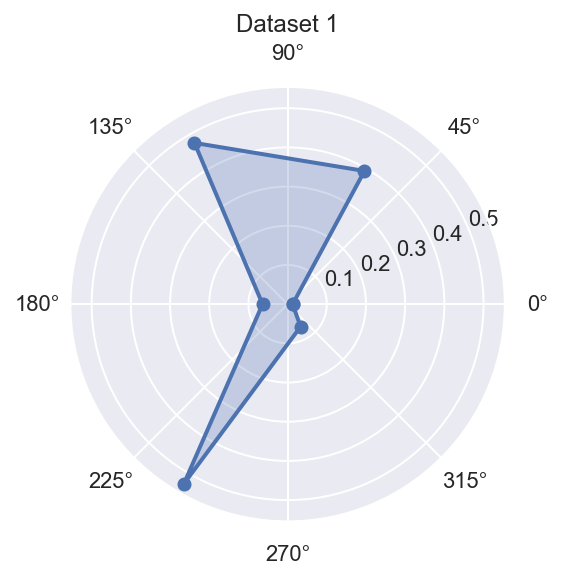

In [267]:
sns.set()

labels=np.array(['HV', 'Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)'])

#stats=df.loc[1,labels].values
stats=df_star_d1_gnds_means

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
#ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Dataset 1")
ax.set_xlabels(['HV', 'Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)'])
ax.grid(True)


In [ ]:
print(list(df_star_d1_gnds_means))
import plotly.express as px
df = pd.DataFrame(dict(
    r=list(df_star_d1_gnds_means),
    theta=['HV', 'Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['HV', 'Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']
categories = [*categories, categories[0]]

data_1 = list(df_star_d1_gnds_means)
data_2 = list(df_star_d1_nsgaii_means)
#data_3 = list(df_star_d2_gnds_means)
#data_4 = list(df_star_d2_nsgaii_means)

data_1 = [*data_1, data_1[0]]
data_2 = [*data_2, data_2[0]]
data_3 = [*data_3, data_3[0]]
data_4 = [*data_4, data_4[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_1, theta=categories, name='D1-GeneticNDS'),
        go.Scatterpolar(r=data_2, theta=categories, name='D1-NSGAII'),
        #go.Scatterpolar(r=data_3, theta=categories, name='D2-GeneticNDS'),
        #go.Scatterpolar(r=data_4, theta=categories, name='D2-NSGAII'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Algorithm comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

In [ ]:
fig2 = go.Figure(
    data=[
        #go.Scatterpolar(r=data_1, theta=categories, name='D1-GeneticNDS'),
        #go.Scatterpolar(r=data_2, theta=categories, name='D1-NSGAII'),
        go.Scatterpolar(r=data_3, theta=categories, name='D2-GeneticNDS'),
        go.Scatterpolar(r=data_4, theta=categories, name='D2-NSGAII'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Algorithm comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig2)

In [ ]:
df_best_conf=df_alg[(df_alg["Population Length"]==40) & (df_alg["Generations"]==300)&(df_alg['Algorithm']=='NSGAIIAlgorithm')&(df_alg['Dataset']=='dataset1')]
summary2=(
df_best_conf.groupby(['Crossover Probability','Mutation Probability'])
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()
    .sort_values("mean_avgvalue",ascending=False)
)
summary2

In [ ]:
df_nsgaii=df_alg[df_alg['Algorithm']=='NSGAIIAlgorithm']
df_nsgaii=df_nsgaii[["Population Length","Generations","Time(s)","HV","Spread","AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
summary = (df_nsgaii.groupby(['Population Length', 'Generations'])
                 [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]
                 .agg(['mean'])
                 .reset_index()
          )
summary



In [ ]:
display(df_alg[df_alg["Replacement Scheme"]=="elitismnds"])

In [ ]:
'''
index=summary.index
plt.scatter(summary)
plt.legend(summary.columns)
'''

In [ ]:
#df_cleared=df_alg[(df_alg["Algorithm"]=="GeneticAlgorithm") | (df_alg["Algorithm"]=="NSGAIIAlgorithm")]
#df_cleared.to_csv('output/experimento_2datasets_2_10.csv', sep=',')